In [1]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('NewSuperMarioBros.U.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)

       Run ID   User ID           User Name Category  Hours  Minutes  Seconds  \
0    9yo45v0m  1xykkm8r             ewaller     Any%    0.0     37.0     45.0   
1    pydqo8vm  1xykkm8r             ewaller     100%    3.0     43.0     55.0   
2    9mrq5jgy  7j49rl81               Kanri     100%    3.0     28.0     35.0   
3    jy90p72y  68w51z8g       roryextralife     Any%    1.0     10.0      8.0   
4    nz1ookjm  5j5plz8v            HaosEdge     Any%    1.0      6.0     45.0   
..        ...       ...                 ...      ...    ...      ...      ...   
827  y2dj85wz  j0n3r2w8  The-Duck-Who-Knows     100%    0.0      1.0     30.0   
828  zplgolrm  j0n3r2w8  The-Duck-Who-Knows     Any%    0.0      0.0     58.0   
829  y2djo37z  j0n3r2w8  The-Duck-Who-Knows     Any%    0.0      0.0     50.0   
830  yv98dg8z  j0n3r2w8  The-Duck-Who-Knows     100%    0.0      0.0     40.0   
831  zn3jn8vy  j0n3r2w8  The-Duck-Who-Knows     Any%    0.0      0.0     52.0   

    Platform ID Platform Na

In [2]:
#Clean data

df = df.loc[(df['Category'] == 'Any%') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

               userName Category  Hours  Minutes  Seconds  TimeSeconds  \
35         Coldblood222     Any%    0.0     44.0     55.0       2695.0   
34            Kidlat404     Any%    0.0     45.0     38.0       2738.0   
102      VoidedDarkness     Any%    0.0     45.0     57.0       2757.0   
17                Kanri     Any%    0.0     40.0     22.0       2422.0   
51            Acearinos     Any%    0.0     39.0     31.0       2371.0   
..                  ...      ...    ...      ...      ...          ...   
821  The-Duck-Who-Knows     Any%    0.0      1.0      7.0         67.0   
823  The-Duck-Who-Knows     Any%    0.0      0.0     46.0         46.0   
824              okosan     Any%    0.0     39.0     24.0       2364.0   
825            Random64     Any%    0.0     59.0      0.0       3540.0   
828  The-Duck-Who-Knows     Any%    0.0      0.0     58.0         58.0   

    Platform Name        Date  
35           WiiU  2012-12-08  
34           WiiU  2012-12-11  
102          Wi

         userName Category  Hours  Minutes  Seconds  TimeSeconds  \
35   Coldblood222     Any%    0.0     44.0     55.0       2695.0   
17          Kanri     Any%    0.0     40.0     22.0       2422.0   
51      Acearinos     Any%    0.0     39.0     31.0       2371.0   
33          Pokey     Any%    0.0     37.0     59.0       2279.0   
21     Hardpelicn     Any%    0.0     37.0     47.0       2267.0   
0         ewaller     Any%    0.0     37.0     45.0       2265.0   
5          spades     Any%    0.0     37.0     42.0       2262.0   
154        Stache     Any%    0.0     37.0     39.0       2259.0   
322        Stache     Any%    0.0     37.0     35.0       2255.0   
216      LilKirbs     Any%    0.0     37.0     32.0       2252.0   
236         Mitch     Any%    0.0     37.0     31.0       2251.0   
293         Mitch     Any%    0.0     37.0     24.0       2244.0   
608         Astix     Any%    0.0     37.0     23.0       2243.0   
629         Astix     Any%    0.0     37.0     1

Text(0.5, 1.0, 'New Super Mario Bros. U Any% World Record Progression')

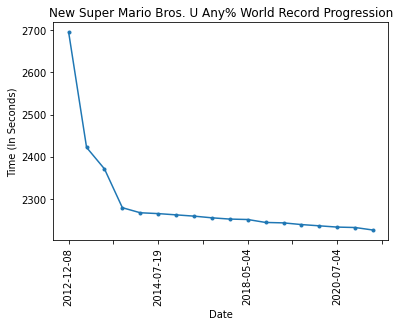

In [3]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime and df.iloc[x].Minutes >= 37:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("New Super Mario Bros. U Any% World Record Progression")

Number of improvements: 54
Number of same times: 82
Total runners: 136
           UserName  Fastest    First  PercentImprovement
135  lorenzokazooie  18359.0  18359.0           -0.000000
72         linky628   2454.0   2454.0           -0.000000
70            Kanri   2422.0   2422.0           -0.000000
68        Acearinos   2371.0   2371.0           -0.000000
134         Viviana   9160.0   9160.0           -0.000000
..              ...      ...      ...                 ...
50          SomeBro     64.0   3142.0           97.963081
12          ewaller     45.0   2265.0           98.013245
53       CoolFullon     67.0   3795.0           98.234519
15   Nickunderscore     45.0   3152.0           98.572335
0             Mitch     28.0   3097.0           99.095899

[136 rows x 4 columns]


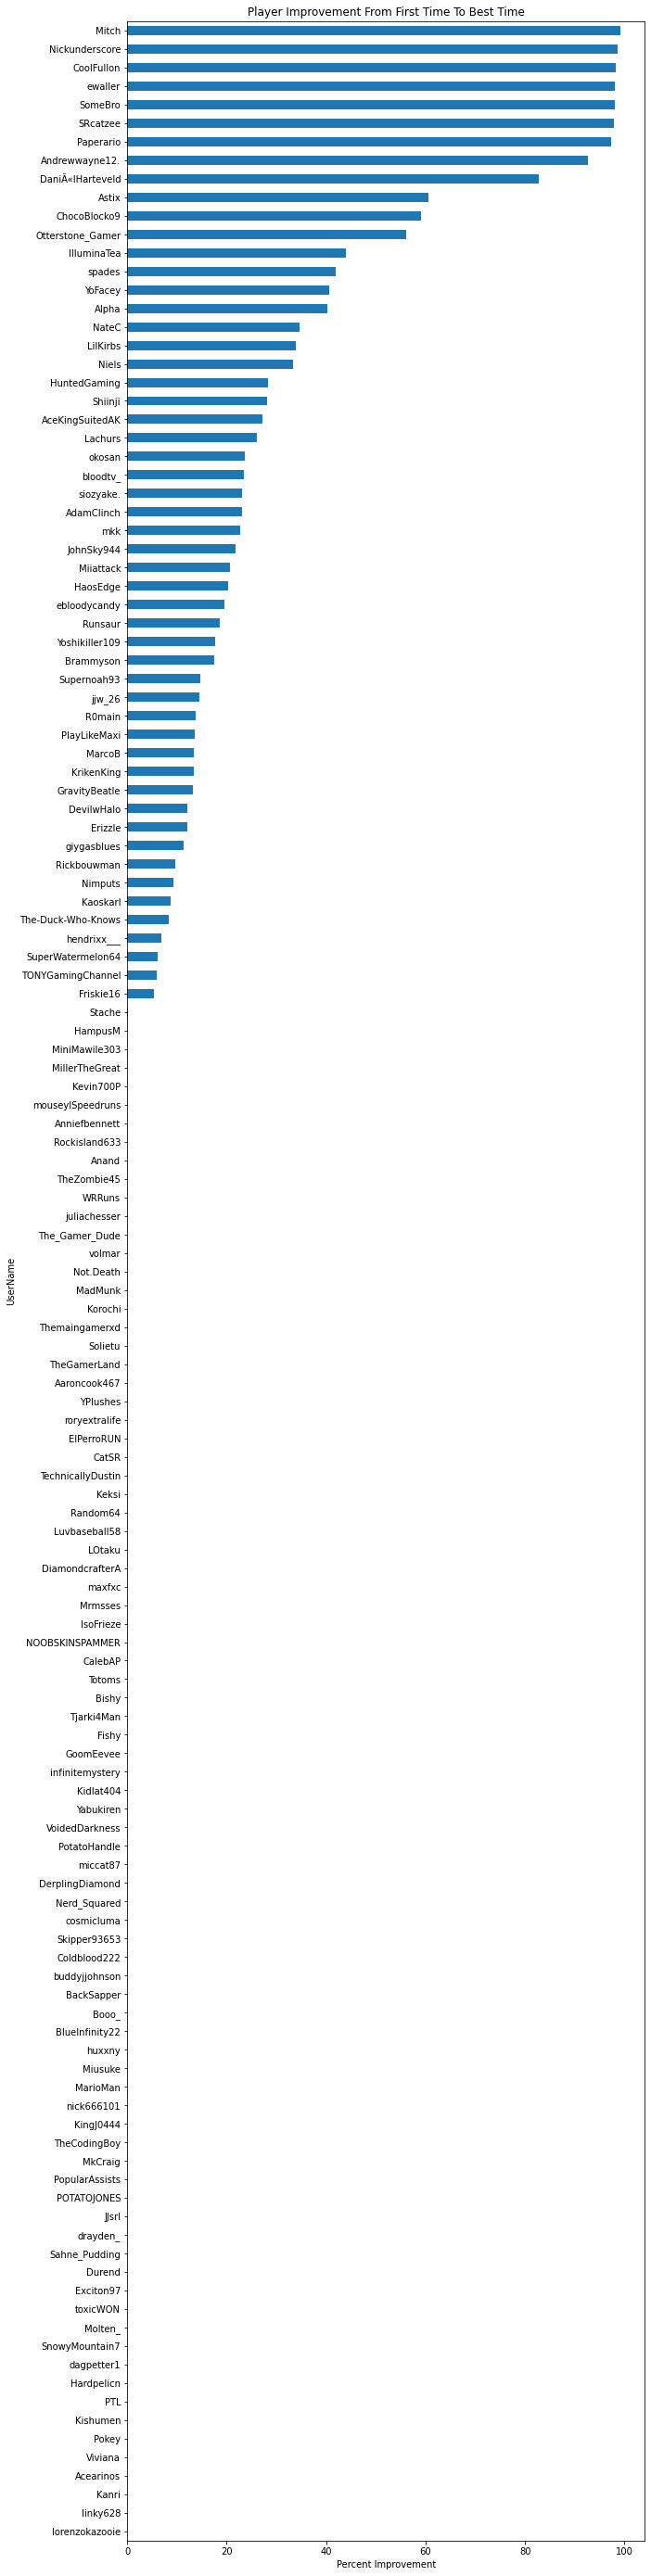

In [4]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

    userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
586    Astix     Any%    0.0      2.0     22.0        142.0          WiiU   
589    Astix     Any%    0.0      7.0     48.0        468.0          WiiU   
605    Astix     Any%    0.0      7.0     16.0        436.0          WiiU   
608    Astix     Any%    0.0     37.0     23.0       2243.0          WiiU   
629    Astix     Any%    0.0     37.0     19.0       2239.0          WiiU   
638    Astix     Any%    0.0      6.0     54.0        414.0          WiiU   
692    Astix     Any%    0.0      1.0     18.0         78.0          WiiU   
695    Astix     Any%    0.0     37.0     16.0       2236.0          WiiU   
728    Astix     Any%    0.0      0.0     56.0         56.0          WiiU   
755    Astix     Any%    0.0     37.0     12.0       2232.0          WiiU   
782    Astix     Any%    0.0     37.0      6.0       2226.0          WiiU   
804    Astix     Any%    0.0      1.0     17.0         77.0          WiiU   

Text(0.5, 1.0, "Paperario's Progression")

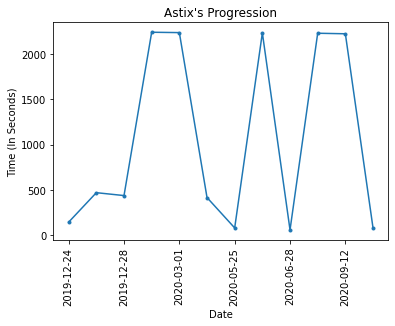

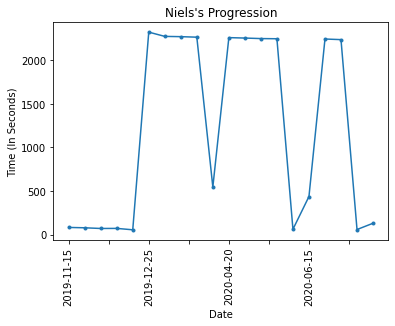

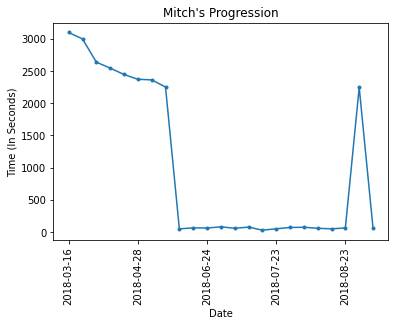

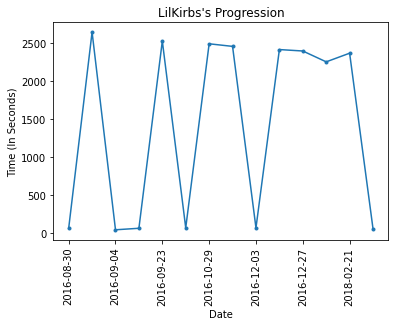

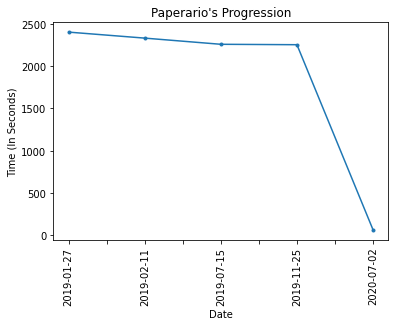

In [6]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Astix']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Astix's Progression")

wrhdf = df.loc[df['userName'] == 'Niels']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Niels's Progression")

wrhdf = df.loc[df['userName'] == 'Mitch']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Mitch's Progression")

wrhdf = df.loc[df['userName'] == 'LilKirbs']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("LilKirbs's Progression")

wrhdf = df.loc[df['userName'] == 'Paperario']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Paperario's Progression")

Text(0.5, 1.0, 'New Super Mario Bros. U Quantity of Runs by Year')

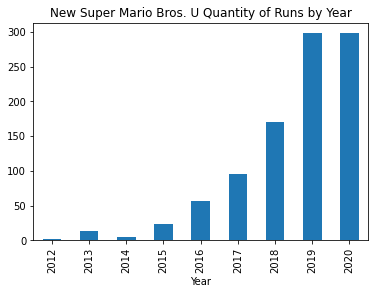

In [5]:
# No graph for runs by platform since there's only one console for this game (WiiU)

count2012 = np.count_nonzero(df['Date'] < '2013-01-01')
count2013 = np.count_nonzero(df['Date'] < '2014-01-01') - count2012
count2014 = np.count_nonzero(df['Date'] < '2015-01-01') - count2013
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2012', count2012], ['2013', count2013], ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("New Super Mario Bros. U Quantity of Runs by Year")

